# DOMAIN: Digital content management

# CONTEXT: Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

# DATA DESCRIPTION: Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link. Link to dataset: https://www.kaggle.com/rtatman/blog-authorship-corpus

# PROJECT OBJECTIVE: The need is to build a NLP classifier which can use input text parameters to determine the label/s of of the blog.

# Import and Analyse the dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/Project-NLP/Dataset - blogtext.csv')

In [ ]:
df.head(5)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


In [ ]:
df.tail(5)

,id,gender,age,topic,sign,date,text
681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."
681283,1713845,male,23,Student,Taurus,"01,July,2004","Hey everybody...and Susan, You might a..."


In [ ]:
df.shape

(681284, 7)

In [ ]:
# Checking if there are any null records
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [ ]:
# Analysing the Gender, Age, Topic and Sign
# Blog age classification from 13 to 48
df['age'].sort_values().unique()

array([13, 14, 15, 16, 17, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48])

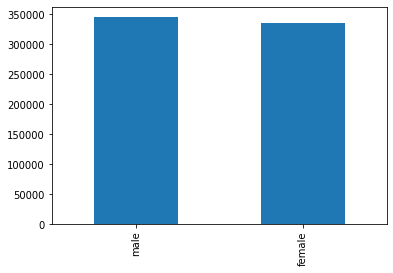

In [ ]:
# Analysing the Gender, Age, Topic and Sign
df['gender'].value_counts().plot(kind = 'bar')

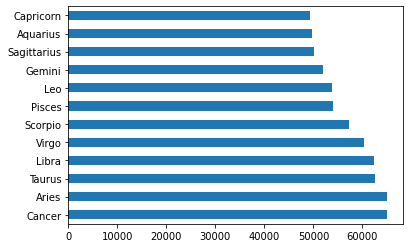

In [ ]:
# Analysing the Gender, Age, Topic and Sign
df['sign'].value_counts().plot(kind = 'barh')

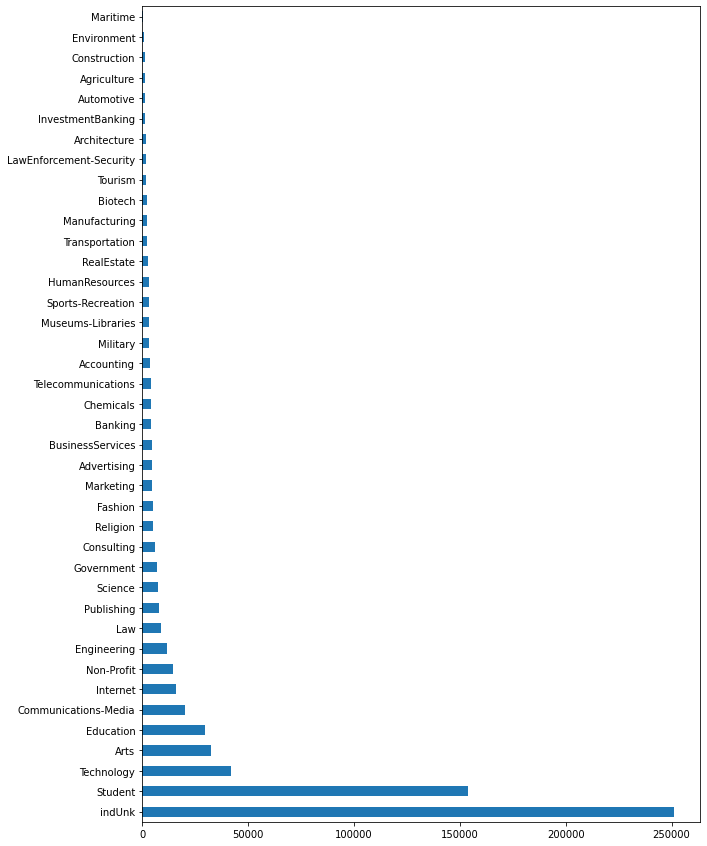

In [ ]:
# Analysing the Gender, Age, Topic and Sign
plt.figure(figsize=(10,15))
df['topic'].value_counts().plot(kind = 'barh')

In [ ]:
# checking for duplicates on the text
df.drop_duplicates(subset="text",inplace=True)

In [ ]:
df.shape

(611652, 7)

In [ ]:
# checking for blog texts - Outliers
df.text.str.len().describe()

count    611652.000000
mean       1163.233872
std        2419.298950
min           4.000000
25%         250.000000
50%         676.000000
75%        1459.000000
max      790123.000000
Name: text, dtype: float64

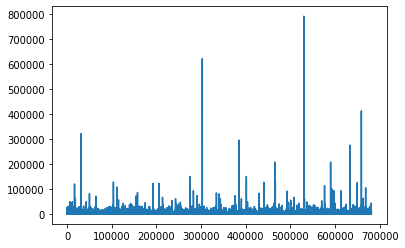

In [ ]:
df.text.str.len().plot()

In [ ]:
# It appears that we have some outliers with text length. Most of the Blog texts fall in the range greater than 100000 words rest of them are outliers
df = df.loc[(df.text.str.len() < 100000) & (df.text.str.len() > 7)]

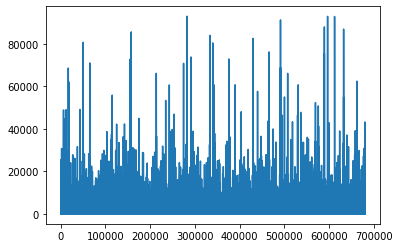

In [ ]:
df.text.str.len().plot()

In [ ]:
df.shape

(611622, 7)

In [ ]:
# drop id and date columns - this columns are not relevant for the model building
df.drop(['id','date'], axis =1, inplace = True)

# Perform data pre-processing on the data: • Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase.

In [ ]:
# There are 68,124 records and is huge to perform analysis and computation, 
# hence we will take a subset of the entire data-set once all errors are fixed and optimization is done
blog_df = df[:10000]

In [ ]:
blog_df.shape

(10000, 5)

In [ ]:
# remove unwanted space
blog_df['Clean_text'] = blog_df['text'].apply(lambda x: re.sub("[^\w ]","",x))

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,Clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",Info has been found 100 pages and ...
1,male,15,Student,Leo,These are the team members: Drewe...,These are the team members Drewes...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,In het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,Thanks to Yahoos Toolbar I can no...


In [ ]:
# covert text to lowercase
blog_df['Clean_text'] = blog_df['Clean_text'].apply(lambda x: x.lower())

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,Clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info has been found 100 pages and ...
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members drewes...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoos toolbar i can no...


In [ ]:
blog_df['Clean_text'] = blog_df['Clean_text'].apply(lambda x: x.strip())

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,Clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info has been found 100 pages and 45 mb of pd...
1,male,15,Student,Leo,These are the team members: Drewe...,these are the team members drewes van der la...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,in het kader van kernfusie op aarde maak je e...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks to yahoos toolbar i can now capture the...


In [ ]:
print("Actual data=======> {}".format(blog_df['text'][1]))

Actual data=======>            These are the team members:   Drewes van der Laag           urlLink mail  Ruiyu Xie                     urlLink mail  Bryan Aaldering (me)          urlLink mail          


In [ ]:
print("Cleaned data=======> {}".format(blog_df['Clean_text'][1]))

Cleaned data=======> these are the team members   drewes van der laag           urllink mail  ruiyu xie                     urllink mail  bryan aaldering me          urllink mail


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
blog_df['Clean_text'] = blog_df['Clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
blog_df.iloc[2][['text', 'Clean_text']].to_dict()

{'Clean_text': 'het kader van kernfusie op aarde maak je eigen waterstofbom build hbomb ascotttartarusuwaeduau andrew scott newsgroups rechumor subject build hbomb humorous date 7 feb 1994 074114 gmt organization university western australia original file dated 12th november 1990 seemed transcript seven days article poorly formatted corrupted added text examine microscope malleable like gold missing anyone full text please distribute responsible accuracy information converted html dionisioinfinetcom 111398 little spellchecking minor edits stolen urllink httpmyohiovoyagernetdionisiofunmownhbombhtml reformatted html validates xhtml 10 strict build hbomb making owning hbomb kind challenge real americans seek wants passive victim nuclear war little effort active participant bomb shelters losers wants huddle together underground eating canned spam winners want push button making hbomb big step nuclear assertiveness training called taking charge sure youll enjoy risks heady thrill playing nu

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,Clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...


# Target/label merger and transformation

In [ ]:
# Merging the Labels for Multi-Label Classification to determine the label for the particular sentence/text from the blog
blog_df['labels'] = blog_df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)

In [ ]:
blog_df.head()

,gender,age,topic,sign,text,Clean_text,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,"[male, 15, Student, Leo]"
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# Preparing the Data for the Model

In [ ]:
#drop  gender,age,topic & sign as they are already merged to labels column
df_model = blog_df.drop(columns=['gender','age','topic','sign','text'], axis=1)

In [ ]:
df_model.head(5)

,Clean_text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


# Train and test split • Vectorisation, etc.

In [ ]:
# Seaprate Features and Labels in to Train and Test datesets
X= df_model['Clean_text']
y = df_model['labels']

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2,test_size = 0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(8000,)
(8000,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(2000,)
(2000,)


In [ ]:
X_test

7919    movers coming wednesday instead packing decide...
3227                                    bends ok computer
1921    lets get record straight 2000 election recount...
4445                   urllink urllink audblog audio post
4855    well got back skar found today sure going braz...
                              ...                        
9119    appassionata beautiful peter wolf comes wagner...
8629    brief hypefactor update spent past two days wr...
5428    well im worried chantele better im worried som...
5126    makes laugh saw taylor hill church today haven...
2967                            meanwhile urllink badgers
Name: Clean_text, Length: 2000, dtype: object

In [ ]:
# import Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Creating Bag of Words with ngrams 1,2, Count Vectors with bi-grams
Cvect = CountVectorizer(binary = True, analyzer = 'word', token_pattern = r'\w{1,}', ngram_range=(1,2), stop_words='english')

In [ ]:
# Fit the CountVectorizer
Cvect.fit(X_train)

#Check the vocablury size
len(Cvect.vocabulary_)

533977

In [ ]:
# displaying the first 100 features
Cvect.get_feature_names()[:100]

['0',
 '0 23003',
 '0 answering',
 '0 article',
 '0 bb',
 '0 cakes',
 '0 er',
 '0 heh',
 '0 heheshame',
 '0 hr',
 '0 im',
 '0 key',
 '0 lesson',
 '0 lol',
 '0 number',
 '0 people',
 '0 short',
 '0 solution',
 '0 uk',
 '0 unemployment',
 '0 urllink',
 '0 used',
 '0 watched',
 '0 wonder',
 '00',
 '00 lighter',
 '00 tcr1',
 '000',
 '000 address',
 '000 people',
 '000 sec',
 '000 songs',
 '000 subject',
 '000001',
 '000001 maybe',
 '001',
 '001 jillian',
 '002',
 '002 impression',
 '002 middle',
 '003',
 '003 love',
 '004',
 '004 nicknames',
 '005',
 '005 gender',
 '006',
 '006 age',
 '007',
 '007 birthday',
 '007 game',
 '007 jersey',
 '008',
 '008 height',
 '009',
 '009 hair',
 '01',
 '01 101102',
 '01 informs',
 '01 known',
 '01 role',
 '01 televive',
 '01 underworld',
 '010',
 '010 eye',
 '0100',
 '0100 hrs',
 '0100 wokeup',
 '011',
 '011 race',
 '011 uich',
 '012',
 '012 glasses',
 '012 w',
 '01234',
 '01234 5',
 '013',
 '013 dodid',
 '013 right',
 '014',
 '014 hair',
 '015',
 '015 bo

In [ ]:
#Transforming the Train data
X_train_ct = Cvect.transform(X_train)

In [ ]:
#Transforming the test data
X_test_ct = Cvect.transform(X_test)

In [ ]:
# Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label
label_counts = dict()

for labels in df_model.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [ ]:
label_counts

{'13': 1,
 '14': 1,
 '15': 1,
 '16': 1,
 '17': 1,
 '23': 1,
 '24': 1,
 '25': 1,
 '26': 1,
 '27': 1,
 '33': 1,
 '34': 1,
 '35': 1,
 '36': 1,
 '37': 1,
 '38': 1,
 '39': 1,
 '40': 1,
 '41': 1,
 '42': 1,
 '43': 1,
 '44': 1,
 '45': 1,
 '46': 1,
 'Accounting': 4,
 'Aquarius': 577,
 'Aries': 4192,
 'Arts': 45,
 'Automotive': 14,
 'Banking': 16,
 'BusinessServices': 88,
 'Cancer': 499,
 'Capricorn': 215,
 'Communications-Media': 98,
 'Consulting': 21,
 'Education': 283,
 'Engineering': 127,
 'Fashion': 1622,
 'Gemini': 165,
 'HumanResources': 2,
 'Internet': 117,
 'InvestmentBanking': 70,
 'Law': 11,
 'LawEnforcement-Security': 10,
 'Leo': 300,
 'Libra': 491,
 'Marketing': 156,
 'Museums-Libraries': 17,
 'Non-Profit': 71,
 'Pisces': 463,
 'Publishing': 4,
 'Religion': 9,
 'Sagittarius': 1084,
 'Science': 63,
 'Scorpio': 952,
 'Sports-Recreation': 80,
 'Student': 1146,
 'Taurus': 826,
 'Technology': 2647,
 'Telecommunications': 2,
 'Virgo': 236,
 'female': 4096,
 'indUnk': 3277,
 'male': 5904}

# Design, train, tune and test the best text classifier.



As we have noticed before, in this task each example can have multiple tags. To deal with such kind of prediction, we need to transform labels in a binary form and the prediction will be a mask of 0s and 1s. For this purpose, it is convenient to use MultiLabelBinarizer from sklearn a. Convert your train and test labels using MultiLabelBinarizer

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))

In [ ]:
y_train =binarizer.fit_transform(y_train)

In [ ]:
y_test =binarizer.transform(y_test)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
y_test

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

# Supervised Models and Test Accuracy - Decide the best model based on that

---



In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
lr=LogisticRegression(solver='lbfgs', max_iter=100, multi_class='ovr') 
knn = KNeighborsClassifier()
svc = LinearSVC(random_state=42, max_iter = 100)

In [ ]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import average_precision_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
    model.fit(X_train, y_train)   # fit the model using the train data

    pred = model.predict(X_test)     # model predictions on the test data
    
    modelscore = round(model.score(X_test, y_test), 3)   # accuracy on the test data
    
    cnf_matrix = confusion_matrix(y_test, pred)
    
    return modelscore, cnf_matrix  # return all the metrics''

In [ ]:
result = pd.DataFrame(columns = ['Model Score', 'Confusion Matrix'])

for model, model_name  in list(zip([lr, knn, svc], ['Logistic_Regression','KNN Classifier','SVC'])):
    result.loc[model_name] = fit_n_print(model, X_train, X_test, y_train, y_test)

In [ ]:
def buildmodel(SLmodel = 'knn'):
  if SLmodel = 'knn':
    model=LogisticRegression(solver='lbfgs', max_iter=100, multi_class='ovr')  
  model=LogisticRegression(solver='lbfgs', max_iter=100, multi_class='ovr')
  model=OneVsRestClassifier(model)
  model.fit(X_train_ct,y_train)
return model

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='ovr', n_jobs=None,
                                                 penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_pred=model.predict(X_test_ct)

In [ ]:
y_pred_inversed = binarizer.inverse_transform(y_pred)
y_test_inversed = binarizer.inverse_transform(y_test)

In [ ]:
for i in range(5):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_pred_inversed[i])
    ))

Text:	  (0, 19369)	1
  (0, 35709)	1
  (0, 51371)	1
  (0, 91709)	1
  (0, 100203)	1
  (0, 110399)	1
  (0, 112324)	1
  (0, 116021)	1
  (0, 118972)	1
  (0, 121404)	1
  (0, 121413)	1
  (0, 121490)	1
  (0, 124277)	1
  (0, 124332)	1
  (0, 142979)	1
  (0, 143105)	1
  (0, 176505)	1
  (0, 176844)	1
  (0, 178714)	1
  (0, 178997)	1
  (0, 233919)	1
  (0, 241922)	1
  (0, 272108)	1
  (0, 293905)	1
  (0, 294011)	1
  :	:
  (0, 315778)	1
  (0, 316089)	1
  (0, 318265)	1
  (0, 319097)	1
  (0, 333858)	1
  (0, 346945)	1
  (0, 356189)	1
  (0, 356453)	1
  (0, 369530)	1
  (0, 369680)	1
  (0, 419444)	1
  (0, 455684)	1
  (0, 455821)	1
  (0, 481421)	1
  (0, 491887)	1
  (0, 493005)	1
  (0, 493186)	1
  (0, 499430)	1
  (0, 499460)	1
  (0, 510176)	1
  (0, 511355)	1
  (0, 511366)	1
  (0, 512644)	1
  (0, 512892)	1
  (0, 522548)	1
True labels:	Internet,Sagittarius,female
Predicted labels:	Sagittarius


Text:	  (0, 48099)	1
  (0, 94697)	1
  (0, 326243)	1
  (0, 326303)	1
True labels:	Aries,Technology,male
Predicted labels

# Logisitic Regression Classification Report

In [ ]:


def PrintClassificationReport(measure = 'weighted'):
  print("Test Accuracy:" + str(accuracy_score(y_test,y_pred)))
  print("F1 Score: " + str(f1_score(y_test,y_pred, average=measure)))
  print("Precision: " + str(precision_score(y_test,y_pred, average=measure)))

In [ ]:
PrintClassificationReport('weighted')

Test Accuracy:0.288
F1 Score: 0.5837362842484467
Precision: 0.8397417151546837


In [ ]:
PrintClassificationReport('macro')

Test Accuracy:0.288
F1 Score: 0.12958427065093783
Precision: 0.3361657106330343


In [ ]:
PrintClassificationReport('micro')

Test Accuracy:0.288
F1 Score: 0.6279506998119908
Precision: 0.8410744264129827


# Linear SVC classification model

In [ ]:
# Create the SVM
from sklearn.svm import LinearSVC
model = 

In [ ]:
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=100,
                                        multi_class='ovr', penalty='l2',
                                        random_state=42, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [ ]:
y_pred=model.predict(X_test_ct)

In [ ]:
y_pred_inversed = binarizer.inverse_transform(y_pred)
y_test_inversed = binarizer.inverse_transform(y_test)

In [ ]:
for i in range(10):
    print('Text:\t{}\nTrue labels:\t{}\nPredicted labels:\t{}\n\n'.format(
        X_test_ct[i],
        ','.join(y_test_inversed[i]),
        ','.join(y_pred_inversed[i])
    ))

Text:	  (0, 19369)	1
  (0, 35709)	1
  (0, 51371)	1
  (0, 91709)	1
  (0, 100203)	1
  (0, 110399)	1
  (0, 112324)	1
  (0, 116021)	1
  (0, 118972)	1
  (0, 121404)	1
  (0, 121413)	1
  (0, 121490)	1
  (0, 124277)	1
  (0, 124332)	1
  (0, 142979)	1
  (0, 143105)	1
  (0, 176505)	1
  (0, 176844)	1
  (0, 178714)	1
  (0, 178997)	1
  (0, 233919)	1
  (0, 241922)	1
  (0, 272108)	1
  (0, 293905)	1
  (0, 294011)	1
  :	:
  (0, 315778)	1
  (0, 316089)	1
  (0, 318265)	1
  (0, 319097)	1
  (0, 333858)	1
  (0, 346945)	1
  (0, 356189)	1
  (0, 356453)	1
  (0, 369530)	1
  (0, 369680)	1
  (0, 419444)	1
  (0, 455684)	1
  (0, 455821)	1
  (0, 481421)	1
  (0, 491887)	1
  (0, 493005)	1
  (0, 493186)	1
  (0, 499430)	1
  (0, 499460)	1
  (0, 510176)	1
  (0, 511355)	1
  (0, 511366)	1
  (0, 512644)	1
  (0, 512892)	1
  (0, 522548)	1
True labels:	Internet,Sagittarius,female
Predicted labels:	male


Text:	  (0, 48099)	1
  (0, 94697)	1
  (0, 326243)	1
  (0, 326303)	1
True labels:	Aries,Technology,male
Predicted labels:	


Te

# SVC classification Report

In [ ]:
PrintClassificationReport('weighted')

Test Accuracy:0.183
F1 Score: 0.48446778849823535
Precision: 0.7858986403455765


In [ ]:
PrintClassificationReport('macro')

Test Accuracy:0.183
F1 Score: 0.10298908924497703
Precision: 0.26900113335095055


In [ ]:
PrintClassificationReport('micro')

Test Accuracy:0.183
F1 Score: 0.5125963418842747
Precision: 0.8273301151132566


# Display and explain detail the classification report

# Getting the Accuracy details for the Predicted Labels
1. Accuracy Score : Test Accuracy score, predicting the labels based on the blog text
2. Fl Score: The F1 score is a weighted average of the precision and recall, higher the F1 score, better the prediction    
3.1 Macro averaged precision: calculate precision for all classes individually and then average them
    3.2 Micro averaged precision: calculate class wise true positive and false positive and then use that to calculate overall precision
4. Average recall score

Precision: What proportion of positive identifications was actually correct?
Recall: What proportion of actual positives was identified correctly?

# Print the true vs predicted labels for any 5 entries from the dataset

In [ ]:
import random
j=[]
for i in range(5):
    j.append(random.randint(300,len(y_pred)))
   
print(j)

for k in j:    
    print('Actual: ',binarizer.inverse_transform(y_test)[k])
    print('Predicted: ',binarizer.inverse_transform(y_pred)[k])
    print("|_____________________________________________________|")

[1850, 569, 1519, 1649, 1220]
Actual:  ('Aries', 'Technology', 'male')
Predicted:  ('Technology',)
|_____________________________________________________|
Actual:  ('Cancer', 'Non-Profit', 'male')
Predicted:  ('male',)
|_____________________________________________________|
Actual:  ('Aries', 'Technology', 'male')
Predicted:  ()
|_____________________________________________________|
Actual:  ('Aries', 'Technology', 'male')
Predicted:  ('Aries', 'Technology', 'male')
|_____________________________________________________|
Actual:  ('Gemini', 'female', 'indUnk')
Predicted:  ()
|_____________________________________________________|
